<a href="https://colab.research.google.com/github/bayu-nanda/credit-clustering-analysis/blob/main/Credit_clustering_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
# create dataframe
df = pd.read_csv('/content/bankmarketing.csv')

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df1=df.copy()

In [ ]:
# Feature scaling
for x in df1.columns:
  if is_numeric_dtype(df1[x]):
    continue

  df1[x] = LabelEncoder().fit_transform(df1[x])

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


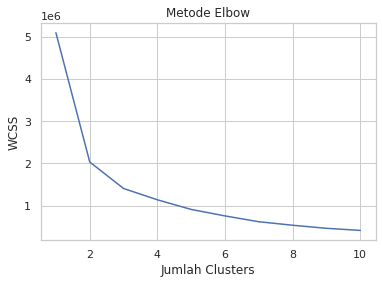

In [ ]:
X=df1[['age','job','marital','default','housing','loan','poutcome']]

# gunakan elbow method
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, random_state=101)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
scaler    = StandardScaler()
scaler.fit(df1)
df_scaled = scaler.transform(df1)

In [ ]:
df_scaled = pd.DataFrame(df_scaled,columns=['age',	'job',	'marital',	'education',	'default',	\
                                            'housing',	'loan',	'contact',	'month',	'day_of_week',	\
                                            'duration',	'campaign',	'pdays',	'previous',	'poutcome',	\
                                            'emp.var.rate',	'cons.price.idx',	'cons.conf.idx',	'euribor3m',	'nr.employed',	'y'])

In [ ]:
df_scaled.head(1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.533034,-0.201579,-0.283741,-1.753925,-0.5136,-1.087707,-0.452491,1.31827,0.762558,-0.718834,...,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.71246,0.33168,-0.356309


In [ ]:
# fitting model
clf  = KMeans(n_clusters=2,random_state=101)
y_predict = clf.fit_predict(df_scaled[['age','job','marital','default','housing','loan','poutcome']])

In [ ]:
df1['Segment']=y_predict

In [ ]:
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Segment
0,56,3,1,0,0,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
1,57,7,1,3,1,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1
2,37,7,1,3,0,2,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
3,40,0,1,1,0,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
4,56,7,1,3,0,0,2,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0


In [ ]:
conditions  = [
                (df1['Segment']==0),
                (df1['Segment']==1)
               ]

pilihan     =['Yes','No']
df1['Segment']=np.select(conditions,pilihan)

In [ ]:
conditions  = [
                (df1['age']<30),
                (df1['age']<=50),
                (df1['age']>50)
               ]

pilihan     =['< 30 th','30-50 th','> 50 th']
df1['AgeCategory']=np.select(conditions,pilihan)

In [ ]:
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Segment,AgeCategory
0,56,3,1,0,0,0,0,1,6,1,...,0,1,1.1,93.994,-36.4,4.857,5191.0,0,Yes,> 50 th
1,57,7,1,3,1,0,0,1,6,1,...,0,1,1.1,93.994,-36.4,4.857,5191.0,0,No,> 50 th
2,37,7,1,3,0,2,0,1,6,1,...,0,1,1.1,93.994,-36.4,4.857,5191.0,0,Yes,30-50 th
3,40,0,1,1,0,0,0,1,6,1,...,0,1,1.1,93.994,-36.4,4.857,5191.0,0,Yes,30-50 th
4,56,7,1,3,0,0,2,1,6,1,...,0,1,1.1,93.994,-36.4,4.857,5191.0,0,Yes,> 50 th
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,...,0,1,-1.1,94.767,-50.8,1.028,4963.6,1,Yes,> 50 th
41184,46,1,1,5,0,0,0,0,7,0,...,0,1,-1.1,94.767,-50.8,1.028,4963.6,0,Yes,30-50 th
41185,56,5,1,6,0,2,0,0,7,0,...,0,1,-1.1,94.767,-50.8,1.028,4963.6,0,Yes,> 50 th
41186,44,9,1,5,0,0,0,0,7,0,...,0,1,-1.1,94.767,-50.8,1.028,4963.6,1,Yes,30-50 th


In [ ]:
def piechart(files,kategori):
  files.value_counts().plot(kind="pie",
                                                      title=f'Pie chart {kategori}',
                                                      figsize=[12,10])
  ax = plt.axes()
  ax.pie(files.value_counts(), autopct='%1.0f%%')


<ipython-input-175-394dc611787d>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


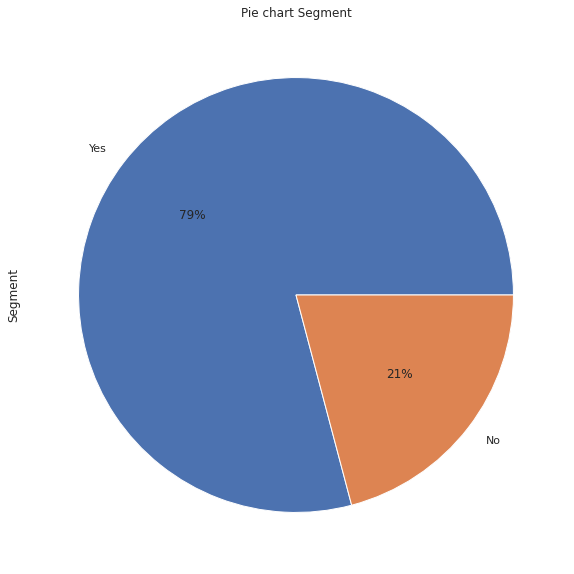

In [ ]:
piechart(df1['Segment'],'Segment')

In [ ]:
# df.groupby(['Segment','default']).size()
df=df.assign(Segment=df1['Segment'])
df=df.assign(AgeCategory=df1['AgeCategory'])


In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Segment,AgeCategory
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Yes,> 50 th
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,No,> 50 th
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Yes,30-50 th
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Yes,30-50 th
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Yes,> 50 th
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,Yes,> 50 th
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,Yes,30-50 th
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,Yes,> 50 th
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,Yes,30-50 th


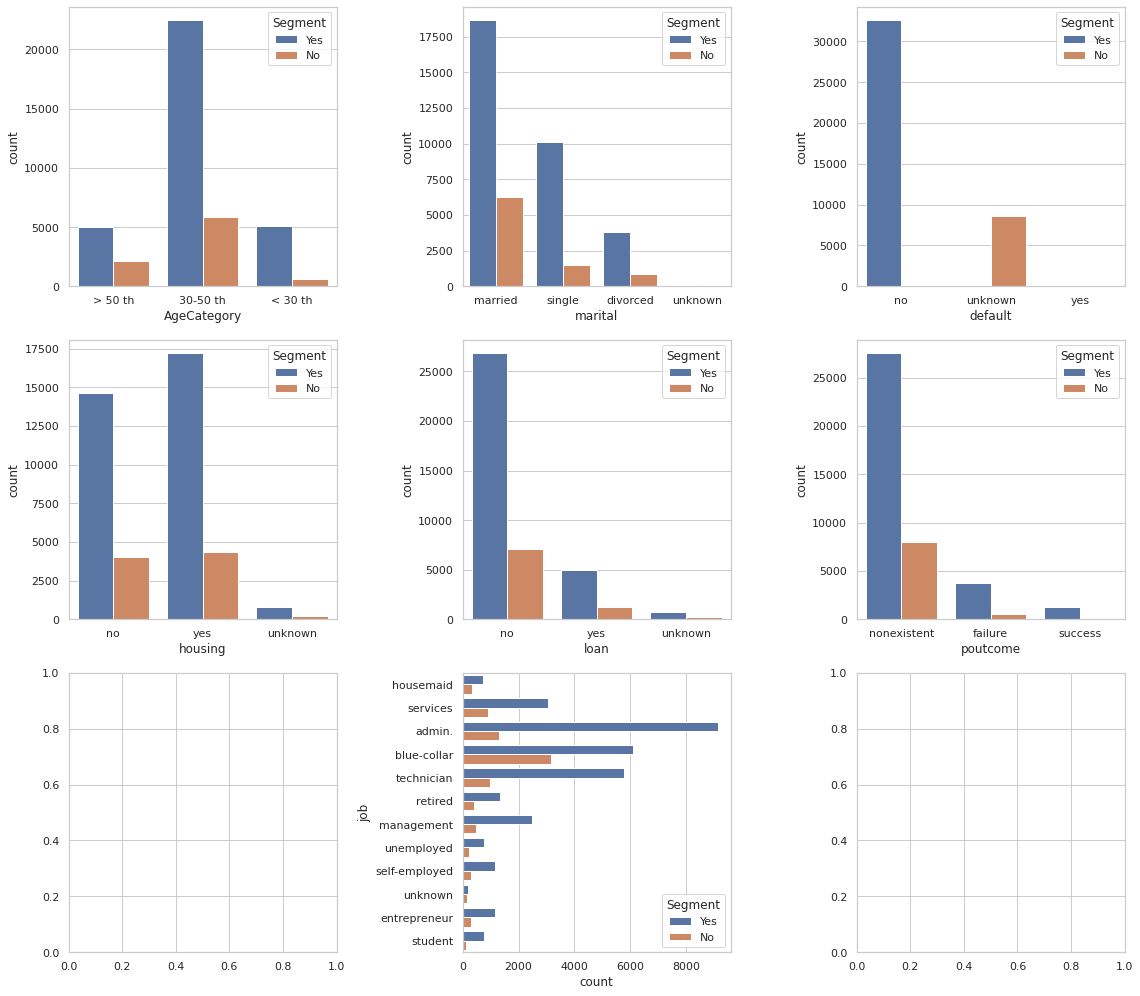

In [ ]:
import seaborn as sns
sns.set(style='whitegrid')

# sub plot
fig, ax     = plt.subplots(3,3,figsize=(16,14))

# menampilkan char kategorikal
sns.countplot(data=df, x='AgeCategory', hue='Segment', ax=ax[0][0])
sns.countplot(data=df, x='marital', hue='Segment', ax=ax[0][1])
sns.countplot(data=df, x='default', hue='Segment', ax=ax[0][2])
sns.countplot(data=df, x='housing', hue='Segment', ax=ax[1][0])
sns.countplot(data=df, x='loan', hue='Segment', ax=ax[1][1])
sns.countplot(data=df, x='poutcome', hue='Segment', ax=ax[1][2])
sns.countplot(data=df, y='job', hue='Segment', ax=ax[2][1])


plt.tight_layout()
plt.show()